In [33]:
import os
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import math
import warnings
warnings.filterwarnings("ignore")

In [34]:
os.chdir(r"C:\Users\me19b\OneDrive\Desktop\PRML_assignment_2")
os.getcwd()
dataset_train_pd = pd.read_csv('A2Q2Data_train.csv',header = None)
dataset_test_pd = pd.read_csv('A2Q2Data_test.csv',header = None)

In [35]:
#renaming columns of train dataset
old= [old for old in range(0,101)]
new=[]
for i in range(0,100):
    new.append('feature_'+str(i))
new.append('y')
dataset_train_pd.rename(columns=dict(zip(old, new)), inplace=True)

In [36]:
dataset_train_pd

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,y
0,0.58351,0.379390,0.839750,0.086861,0.611920,0.39203,0.189640,0.585090,0.89494,0.393850,...,0.51706,0.20535,0.829990,0.24995,0.319800,0.19674,0.958550,0.849480,0.923690,1.9741
1,0.86622,0.451350,0.934790,0.235810,0.504880,0.49742,0.117220,0.574880,0.71051,0.336890,...,0.27412,0.46065,0.655440,0.56656,0.490620,0.19920,0.320680,0.414190,0.830230,2.3354
2,0.39142,0.919950,0.138730,0.991810,0.543670,0.98449,0.340260,0.206470,0.40131,0.128990,...,0.27247,0.38911,0.799490,0.57753,0.866820,0.69741,0.628630,0.294790,0.542800,2.2053
3,0.79553,0.278540,0.228900,0.789290,0.492220,0.67084,0.769410,0.057104,0.20393,0.086936,...,0.24901,0.65976,0.943350,0.41246,0.927150,0.11015,0.101310,0.668010,0.345730,2.0400
4,0.65223,0.966650,0.179850,0.354060,0.840420,0.92891,0.014597,0.229530,0.43920,0.548940,...,0.93277,0.23674,0.027077,0.27111,0.233660,0.56356,0.047289,0.627920,0.979300,2.2053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.13627,0.056966,0.229530,0.343080,0.019914,0.29071,0.124340,0.523650,0.80031,0.120490,...,0.23140,0.75825,0.418120,0.33551,0.361130,0.12088,0.050074,0.335240,0.040619,3.0543
9996,0.95662,0.141930,0.978510,0.782700,0.198780,0.29844,0.331600,0.302100,0.68403,0.827360,...,0.47084,0.71044,0.323540,0.65593,0.043369,0.69314,0.672490,0.573740,0.110510,2.3255
9997,0.89209,0.997530,0.880430,0.813160,0.294460,0.40088,0.198950,0.402530,0.98442,0.746290,...,0.64760,0.86836,0.227950,0.92668,0.735700,0.77533,0.827720,0.331150,0.928750,2.0964
9998,0.70381,0.422940,0.259230,0.230480,0.710920,0.27516,0.843470,0.338950,0.22252,0.586820,...,0.76356,0.00795,0.569030,0.93311,0.501910,0.36688,0.822460,0.498100,0.060471,1.8405


In [37]:
#renaming columns of test dataset
old_test= [old for old in range(0,101)]
new_test=[]
for i in range(0,100):
    new_test.append('feature_test_'+str(i))
new_test.append('y_test')
dataset_test_pd.rename(columns=dict(zip(old_test, new_test)), inplace=True)

In [38]:
dataset_test_pd 

,feature_test_0,feature_test_1,feature_test_2,feature_test_3,feature_test_4,feature_test_5,feature_test_6,feature_test_7,feature_test_8,feature_test_9,...,feature_test_91,feature_test_92,feature_test_93,feature_test_94,feature_test_95,feature_test_96,feature_test_97,feature_test_98,feature_test_99,y_test
0,0.21302,0.446210,0.51432,0.219750,0.495440,0.463670,0.26007,0.28137,0.983820,0.00777,...,0.92910,0.286690,0.45841,0.788740,0.041794,0.58736,0.904910,0.91718,0.68321,2.0121
1,0.32563,0.703990,0.31970,0.045240,0.869680,0.131360,0.47664,0.26632,0.334520,0.81200,...,0.51868,0.255460,0.29498,0.008869,0.169970,0.92325,0.421340,0.90906,0.61539,1.8164
2,0.49539,0.623570,0.58121,0.879160,0.930960,0.203040,0.35752,0.31232,0.066225,0.46389,...,0.85782,0.505300,0.32361,0.693090,0.690430,0.01604,0.467410,0.67303,0.60459,1.6435
3,0.88875,0.013187,0.87982,0.858160,0.793920,0.792390,0.76522,0.85145,0.233610,0.57924,...,0.25535,0.383410,0.55130,0.727730,0.676890,0.84605,0.611160,0.58514,0.41724,2.7451
4,0.15178,0.540760,0.26896,0.006752,0.101020,0.342080,0.86855,0.32698,0.285460,0.80503,...,0.54955,0.129320,0.94848,0.326100,0.268010,0.27125,0.535350,0.91872,0.16801,1.8932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.10578,0.870530,0.66376,0.570310,0.691110,0.065131,0.25840,0.56343,0.958840,0.75578,...,0.73314,0.947650,0.41785,0.450240,0.226930,0.12547,0.506790,0.60808,0.61612,2.2680
496,0.36756,0.673490,0.54089,0.932350,0.037031,0.806840,0.50789,0.27116,0.879440,0.57790,...,0.75535,0.067279,0.97832,0.759940,0.991350,0.80861,0.716250,0.43949,0.79699,2.8274
497,0.24582,0.320620,0.79933,0.743320,0.314150,0.713150,0.90045,0.67816,0.392680,0.96917,...,0.59358,0.711090,0.45839,0.434920,0.464740,0.69551,0.447860,0.78741,0.11548,2.8058
498,0.31768,0.937750,0.91269,0.840630,0.301710,0.600530,0.59427,0.10969,0.438170,0.39921,...,0.58933,0.892750,0.70348,0.715340,0.198450,0.31288,0.099705,0.82134,0.71902,2.2495


In [39]:
dataset_train = dataset_train_pd.to_numpy()
dataset_test = dataset_test_pd.to_numpy()

# Obtain the least squares solution wML to the regression problem using the analytical solution.


In [40]:
#x and y are taken from the train data
x_transpose = dataset_train[:,0:100]
x = x_transpose.transpose()
y = dataset_train[:,100]

In [41]:
# w of maximum likelihood is found
w_ml = (np.linalg.inv(x@x_transpose))@(x@y)

In [42]:
w_ml

array([-7.84961009e-03, -1.36715320e-02, -3.61656438e-03,  2.64909160e-03,
        1.88551446e-01,  2.65314657e-03,  9.46531786e-03,  1.79809481e-01,
        3.73757317e-03,  4.99608944e-01,  8.35836265e-03,  4.29108775e-03,
        1.42141179e-02,  3.94232414e-03,  9.36795890e-03, -1.12038274e-03,
        3.35727500e-03,  1.16152212e-03, -9.40884707e-03, -2.45575476e-03,
       -1.17409629e-02, -1.01960612e-02,  7.95771321e-03, -1.00574854e-02,
        6.04882939e-03, -4.67345192e-03, -3.09091547e-03,  8.14909193e-03,
        1.20264599e-02, -6.82458163e-03, -8.65405539e-03,  9.86273479e-04,
        4.92968011e-03,  5.99772461e-03, -1.34667860e-02,  1.07075729e-03,
        1.32745992e-02, -1.14148742e-02, -2.01056697e-02,  5.85096240e-01,
        4.94483247e-04, -7.86666920e-04, -2.71926574e-03, -9.54021938e-03,
       -5.44161058e-03,  9.80679209e-03, -6.72540624e-03, -4.45414276e-04,
        6.98516508e-03,  3.16138907e-02,  4.51763485e-01, -8.75221380e-03,
        2.55167390e-03,  

In [43]:
# least square error is found for maximum likelihood
least_sq_err_ML = (np.linalg.norm((x_transpose@w_ml) - y))**2
print('least square error for W_ML: ',least_sq_err_ML)

least square error for W_ML:  396.8644186272515


# Code the gradient descent algorithm with suitable step size to solve the least squares algorithms and plot ||w_t − w_ML||^2 as a function of t. What do you observe?

In [46]:
# loop for gradient descent algorithm
#eta = 1/nt
n = 25**4
e = 0.00001
t = 0
norm_wt_wml = []

#iteration 0
W0 = np.array([0]*len(x))
norm_wt_wml.append(np.linalg.norm(W0-w_ml))

#iteration 1
t = t+1
W_1 = W0 - ((1/(n*t))*2*(((x@x_transpose)@W0)-(x@y)))
norm = (np.linalg.norm(W_1 - W0))
print(norm)
W_t = W_1
norm_1 = norm
# convergence condition
while((norm>e)&(norm<=norm_1)):
    norm_wt_wml.append(np.linalg.norm(W_t-w_ml))
    t = t+1
    W_t1 = W_t - ((1/(n*t))*2*(((x@x_transpose)@W_t)-(x@y)))
    norm_1 = norm
    norm = np.linalg.norm(W_t1 - W_t)
    print(norm)
    W_t = W_t1

0.5688477998295292
0.08098917115381712
0.01942284594373785
0.008437544240706479
0.004682076910372902
0.002989641258905555
0.00209497919688039
0.00156912330259834
0.0012353287832567702
0.0010105179423524902
0.0008517312057992466
0.0007350832916978951
0.000646511204938136
0.0005773387244461166
0.0005219987705672434
0.0004767967775098995
0.00043920751319601894
0.00040745929213650844
0.00038027969804239594
0.00035673541785396465
0.0003361286710614573
0.0003179286353297046
0.00030172505910105855
0.00028719626133092525
0.00027408665460113284
0.00026219069244789675
0.00025134122663159997
0.00024140094106337316
0.00023225596479669615
0.00022381105021460345
0.00021598589036047437
0.0002087122756123538
0.0002019318759949838
0.00019559449493033375
0.00018965668188309118
0.00018408062086771232
0.00017883323292791024
0.0001738854460120197
0.0001692115968702013
0.0001647889378740431
0.00016059722782724108
0.00015661839047380097
0.00015283622792634105
0.00014923617892385728
0.00014580511389643625
0.0

In [47]:
# least square error is found for gradient descent algorithm
W_g = W_t
least_sqr_err_g = (np.linalg.norm((x_transpose@W_g) - y))**2
print('least square error for W_GDA: ',least_sqr_err_g)

least square error for W_GDA:  2284.759251021918


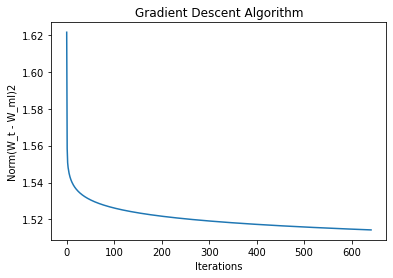

In [48]:
#plot of Norm(W_t - W_ml)2 vs number of iterations
i = [i  for i in range(0,len(norm_wt_wml))]
plt.plot(i,norm_wt_wml)
plt.xlabel('Iterations')
plt.ylabel('Norm(W_t - W_ml)2')
plt.title('Gradient Descent Algorithm');

# Code the stochastic gradient descent algorithm using batch size of 100 and plot ||wt − wML||2 as a function of t. What are your observations?


In [49]:
# function for random initialisation of batches for stochastic gradient desscent algorithm
dataset_train_pd = pd.read_csv('A2Q2Data_train.csv',header = None)
dataset_train_np = np.array(dataset_train_pd)
def random_initialisation(dataset_train_pd):
    dataset_train_pd_r = dataset_train_pd.sample(100, axis='rows')
    dataset_train_r = dataset_train_pd_r.to_numpy()
    x_transpose_rand = dataset_train_r[:,0:100]
    x_rand= x_transpose_rand.transpose()
    y_rand = dataset_train_r[:,100]
    return x_transpose_rand ,x_rand,y_rand 

In [50]:
xt_r,x_r,y_r =  random_initialisation(dataset_train_pd)

In [51]:
y_r 

array([2.153 , 2.8242, 3.0478, 2.9686, 1.8291, 2.1712, 1.6911, 1.987 ,
       2.1018, 2.1726, 2.3828, 1.8696, 2.9432, 1.1194, 2.2565, 2.7952,
       2.6254, 3.1372, 2.7977, 2.5039, 2.172 , 1.9633, 2.1754, 2.6842,
       2.2761, 2.8017, 2.8459, 2.2967, 2.2748, 2.809 , 2.0596, 2.2739,
       1.0017, 1.9693, 3.2031, 2.2737, 2.2549, 2.0582, 1.0639, 2.3923,
       2.4701, 1.7072, 2.6659, 2.1888, 2.7079, 3.0143, 1.2638, 2.9136,
       2.2178, 2.8742, 2.3545, 1.159 , 2.2495, 3.0288, 2.9123, 1.5415,
       3.0202, 2.59  , 2.7974, 1.6768, 2.3688, 2.3721, 1.8154, 2.1876,
       1.1483, 1.4621, 2.6103, 1.3053, 2.4348, 1.7225, 2.5992, 2.9213,
       2.5207, 2.5317, 1.7201, 1.5439, 1.6062, 2.3377, 1.7719, 2.311 ,
       2.8361, 2.9579, 1.7116, 2.612 , 1.4485, 1.7608, 2.9415, 1.7132,
       1.789 , 2.3506, 2.6036, 2.1413, 2.453 , 1.9933, 1.7883, 2.2462,
       1.8777, 2.4318, 1.96  , 2.3486])

In [52]:
xt_r

array([[0.47466 , 0.5239  , 0.36002 , ..., 0.306   , 0.44054 , 0.21955 ],
       [0.62455 , 0.77338 , 0.65047 , ..., 0.87611 , 0.37634 , 0.57515 ],
       [0.22449 , 0.14003 , 0.2891  , ..., 0.21738 , 0.99852 , 0.43242 ],
       ...,
       [0.94286 , 0.21395 , 0.94833 , ..., 0.26162 , 0.77535 , 0.5503  ],
       [0.32023 , 0.4201  , 0.12965 , ..., 0.82452 , 0.28174 , 0.86995 ],
       [0.55594 , 0.051056, 0.75944 , ..., 0.87449 , 0.975   , 0.65682 ]])

In [53]:
# loop for stochastic gradient descent algorithm till convergence
#eta = 1/nt
n = 14**3
t = 0
e = 10**(-5)
norm_wt_wml_s = []
norm_wt_wml_t = []

Xt_np_s, X_np_s, Y_s = random_initialisation(dataset_train_pd)
W_t_s = np.array([0]*len(X_np_s))
sum_t = W_t_s
Y_pred_t_s = x_transpose@W_t_s
norm_t_s = np.linalg.norm(Y_pred_t_s-y)
norm_wt_wml_s.append(np.linalg.norm(W_t_s-w_ml))
norm_wt_wml_t.append(np.linalg.norm(W_t_s-w_ml))

while(True):
    t = t+1
    Xt_np_s, X_np_s, Y_s = random_initialisation(dataset_train_pd)
    W_t1_s = W_t_s - ((2/(n*t))*(((X_np_s@Xt_np_s)@W_t_s)-(X_np_s@Y_s)))
    sum_t = W_t1_s+sum_t
    W_s = sum_t/t
    Y_pred_t1_s = (x_transpose@W_s)
    norm_t1_s = np.linalg.norm(Y_pred_t1_s-y)
    # convergence condition
    if ((norm_t_s-norm_t1_s)>e):
        W_t_s = W_t1_s
        Y_pred_t_s = Y_pred_t1_s
        norm_t_s = norm_t1_s
        norm_wt_wml_s.append(np.linalg.norm(W_s-w_ml))
        norm_wt_wml_t.append(np.linalg.norm(W_t_s-w_ml))
    else:
        print(len(norm_wt_wml_s))
        print(norm_wt_wml_s[len(norm_wt_wml_s)-1])
        t = t-1
        print(t)
        break

23111
1.471419648949671
23110


In [54]:
#least square error
W_S = W_s
least_sqr_err_SGDA = (np.linalg.norm((x_transpose@W_S) - y))**2
print('least square error for W_SGDA: ',least_sqr_err_SGDA)

least square error for W_SGDA:  2178.4822200065782


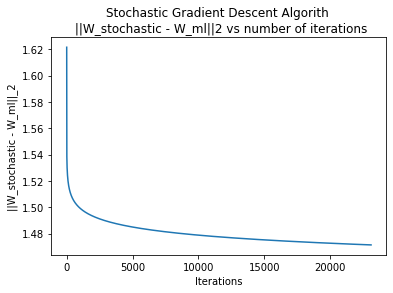

In [55]:
#plot of Stochastic Gradient Descent Algorith \n ||W_stochastic - W_ml||2 vs number of iterations
i = [i  for i in range(0,len(norm_wt_wml_s))]
plt.plot(i,norm_wt_wml_s)
plt.xlabel('Iterations')
plt.ylabel('||W_stochastic - W_ml||_2')
plt.title('Stochastic Gradient Descent Algorith \n ||W_stochastic - W_ml||2 vs number of iterations');

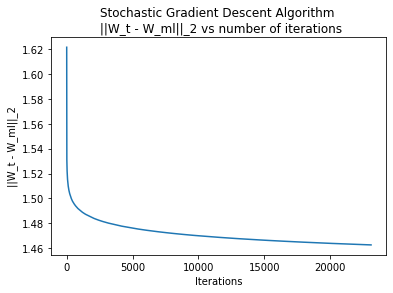

In [56]:
#plot of Stochastic Gradient Descent Algorithm \n ||W_t - W_ml||_2 vs number of iterations
i = [i  for i in range(0,len(norm_wt_wml_t))]
plt.plot(i,norm_wt_wml_t)
plt.xlabel('Iterations')
plt.ylabel('||W_t - W_ml||_2')
plt.title('Stochastic Gradient Descent Algorithm \n ||W_t - W_ml||_2 vs number of iterations');

# Code the gradient descent algorithm for ridge regression. Cross-validate for various choices of λ and plot the error in the validation set as a function of λ. For the best λ chosen, obtain wR. Compare the test error (for the test data in the file A2Q2Data test.csv) of wR with wML. Which is better and why?

In [57]:
# dividing the train data in the ratio of 4:1 for validation
data_train_80 = dataset_train[:8000,:]
data_test_80 = dataset_train[8000:,:]
x_trans_train = data_train_80[:,0:100]
x_train = x_trans_train.transpose()
y_train = data_train_80[:,100]
x_trans_cv = data_test_80[:,0:100]
x_cv = x_trans_cv.transpose()
y_cv = data_test_80[:,100]

In [58]:
# loop till convergence
#eta = 1/nt
lamda_ridge = [l*5 for l in range(0,100)]
n = 10**7
e = 0.0001
Train_error = []
w_ridge = []
w_ridge_min = []
for lamda_r in lamda_ridge:
    t = 0
    #iteration 0
    W_0 = np.array([0]*len(x))

    #iteration 1
    t = t+1
    W_1 = W_0 - ((1/(n*t))*2*(((x_train@x_trans_train)@W_0)-(x_train@y_train)+(lamda_r*W_0)))
    norm = (np.linalg.norm(W_1 - W_0))
    W_t_r = W_1
    norm_1 = norm
    #convergence condition
    while((norm>e)&(norm<=norm_1)):
        t = t+1
        W_t1_r = W_t_r - ((1/(n*t))*2*(((x_train@x_trans_train)@W_t_r)-(x_train@y_train)+(lamda_r*W_t_r)))
        norm_1 = norm
        norm = np.linalg.norm(W_t1_r - W_t_r)
        W_t_r = W_t1_r
    w_ridge.append(list(W_t_r))
    W_r = W_t_r
    w_ridge_min.append(((((x_trans_cv@W_r) - y_cv).transpose())@((x_trans_cv@W_r) - y_cv)) + lamda_r*((W_r.transpose()@W_r)))
    Train_error.append((((x_trans_cv@W_r) - y_cv).transpose())@((x_trans_cv@W_r) - y_cv))

In [59]:
#Calculating least square error for Ridge and Ml for Cross Validation Data
Train_error_ml =((((x_trans_cv@w_ml) - y_cv).transpose())@((x_trans_cv@w_ml) - y_cv))
Train_error_r_min = Train_error[Train_error.index(min(Train_error))]
print('least square error for Cross Validation data W_ml: ',Train_error_ml)
print('least square error for Cross Validation data W_Ridge: ',Train_error_r_min)

least square error for Cross Validation data W_ml:  84.93823913416273
least square error for Cross Validation data W_Ridge:  6781.145342753271


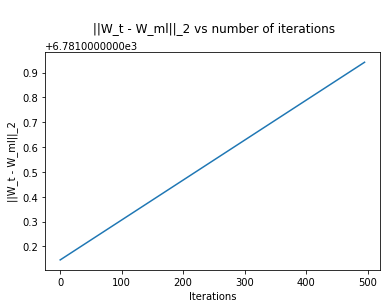

In [60]:
# plot of train error for cross validation vs number of iterations
plt.plot(lamda_ridge,Train_error)
plt.xlabel('Iterations')
plt.ylabel('train error')
plt.title('\n train error for cross validation vs number of iterations\n');

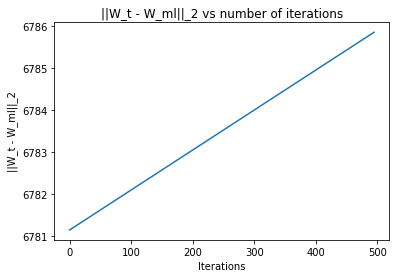

In [61]:
# plot of W_r vs number of iterations
lamda_ridge = [l*5 for l in range(0,100)]
plt.plot(lamda_ridge,w_ridge_min)
plt.xlabel('Iterations')
plt.ylabel('W_r')
plt.title('W_r vs number of iterations');

In [66]:
#calculating the lamda such that W_r is minimum
w_ridge_min_idx = np.array(w_ridge_min).argsort()
lamda_new = w_ridge_min_idx[0]*5
w_ridge_min_lamda = w_ridge[w_ridge_min_idx[0]]
W_r = (np.linalg.inv((x@x_transpose)+lamda_new*np.eye(len(x@x_transpose))))@(x@y)
Train_error_whole_data = (np.linalg.norm((x_transpose@np.array(w_ridge_min_lamda )) - y))**2

#Second minimum value
lamda_1 = w_ridge_min_idx[1]*10
W_R_min_1 = w_ridge[w_ridge_min_idx[1]]
W_r_1 = (np.linalg.inv((x@x_transpose)+lamda_1*np.eye(len(x@x_transpose))))@(x@y)
Train_error_whole_data_1 = (np.linalg.norm((x_transpose@np.array(w_ridge_min_lamda)) - y))**2
print('Train error on whole data is {} for lamda {}: '.format(Train_error_whole_data,lamda_new))

Train error on whole data is 33839.285642636176 for lamda 0: 


In [64]:
#Spliting X_test, Y_test form the given test dataset
x_transpose_test = dataset_test[:,0:100]
x_test = x_transpose_test.transpose()
y_test = dataset_test[:,100]

Test_err_ML = (np.linalg.norm((x_transpose_test@w_ml) - y_test))**2
Test_err_ridge = (np.linalg.norm((x_transpose_test@W_r) - y_test))**2
Test_err_ridge_1 = (np.linalg.norm((x_transpose_test@np.array(w_ridge_min_lamda)) - y_test))**2
print('Test error of W_ml: {}\nTest of error of W_r: {} \nTest of error of W_r_1: {}'.format(Test_err_ML,Test_err_ridge,Test_err_ridge_1))

Test error of W_ml: 185.36365558489518
Test of error of W_r: 185.36365558489518 
Test of error of W_r_1: 1665.5920475764615
